In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# Let's create a perceptron!

This notebook is a simple introduction to the perceptron, a fundamental building block of neural networks. We will create a perceptron from scratch and train it to classify points in a 2D plane. First, we define the perceptron class and its methods. I am using the sigmoid activation function, but you can easily change it to another one, if you know how to write out it's derivative.

This is a bit unusual - usually you would just implement the model in pytorch or tensorflow. But I think it's a good exercise to understand the basics of neural networks and see how the derivatives are calculated and used in the backpropagation algorithm in an explicit way.

The key things to know about how this works is that the perceptron is essentially a linear regression, with the sigmoid function is used to introduce non-linearity. The perceptron is trained using the gradient descent algorithm, which is a simple optimization algorithm that uses the derivative of the loss function to update the weights of the model. We define the forward and backward methods to calculate the output of the model and the gradient of the loss function with respect to the weights/parameters, respectively. We then use these methods to train the model on a simple classification task. Normally with a pytorch type model you only have the forward method and the backward method is handled by the autograd engine (aka magic).

In [3]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def d_sigmoid(X):
    return sigmoid(X) * (1 - sigmoid(X))

class Perceptron():

    def __init__(self, input_size,  output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.rand(input_size, output_size)
        self.bias = np.random.rand(output_size)
        self.learning_rate = 0.01

    def forward(self, X):
        self.X = X
        self.Z = np.dot(X, self.weights) + self.bias
        self.A = sigmoid(self.Z)
        return self.A
    
    def backward(self, dA):
        dZ = dA * d_sigmoid(self.Z)
        dW = np.dot(self.X.T, dZ)
        db = np.sum(dZ, axis=0)
        dX = np.dot(dZ, self.weights.T)
        self.weights -= self.learning_rate * dW
        self.bias -= self.learning_rate * db
        return dX
    
    def train(self, X, y, epochs):
        self.loss = []
        for i in range(epochs):
            A = self.forward(X)
            loss = np.sum((A - y) ** 2)
            dA = 2 * (A - y)
            self.backward(dA)
            self.loss.append(loss)

# Creating the simple dataset

We will create a simple dataset of points in a 2D plane. The points will be classified as either 0 or 1 based on their position relative to a line. We will use this dataset to train the perceptron to classify the points, and see if it can learn to separate the two classes.

In [4]:
X = np.random.rand(100, 2)
y = np.zeros((100, 1))
y[X[:, 0] > X[:, 1]] = 1

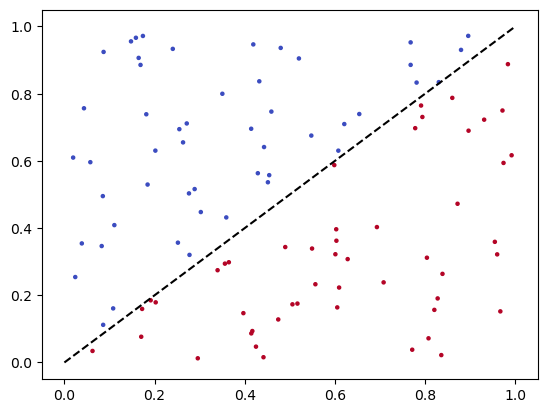

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='coolwarm', s=5)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

In [6]:
model = Perceptron(2, 1)
model.train(X, y, 5000)

[]

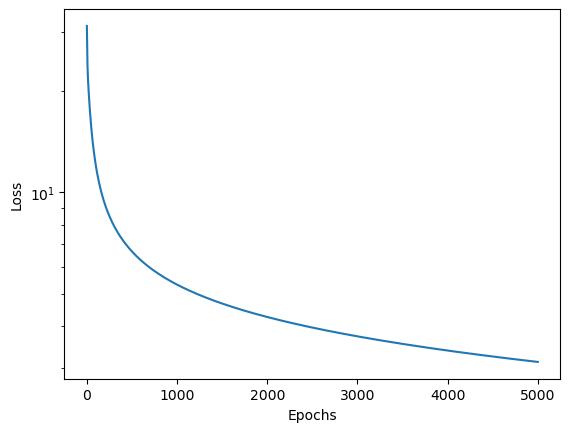

In [7]:
plt.plot(model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.semilogy()

#  How did this first model do?

Now that we have trained the perceptron, let's see how well it performs. We will plot the test data, which is "densely" sampled from the plane on [-1,1] and the decision boundary learned by the perceptron. As you will see this works quite well! Great job perceptron.

In [10]:
y_pred = model.forward(X)

In [11]:
# Plot the decision boundary
xx = np.linspace(0, 1, 500)
yy = np.linspace(0, 1, 500)
XX, YY = np.meshgrid(xx, yy)
ZZ = np.zeros(XX.shape)
for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        ZZ[i, j] = model.forward(np.array([[XX[i, j], YY[i, j]]]))

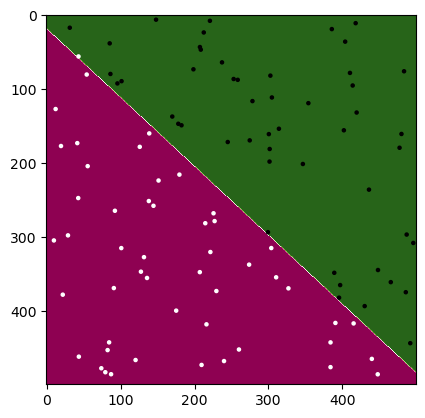

In [12]:
fig, ax = plt.subplots()
ax.imshow(ZZ>0.5, cmap='PiYG')
ax.scatter(500* X[:, 0], 500 * X[:, 1], c=y[:, 0], cmap='bone_r', s=5)


# Upping the stakes with a more complex dataset

All we did was segment the plane, not super inspiring. Can the perceptron do more interesting things? Well sort of, but not very well. Now we define a classification problem where instead of a diagonal boundary we are looking at classifying a quadrant. As you can guess, the perceptron will struggle with this task. But it's still interesting to see how it tries to learn the boundary.

In [13]:
X = np.random.rand(500, 2)
y = np.zeros((500, 1))

# Make the classication problem a bit harder
y[X[:, 0] > 0.5] = 1
y[X[:, 1] > 0.5] = 1

In [14]:
model = Perceptron(2, 1)
model.train(X, y, 5000)

[]

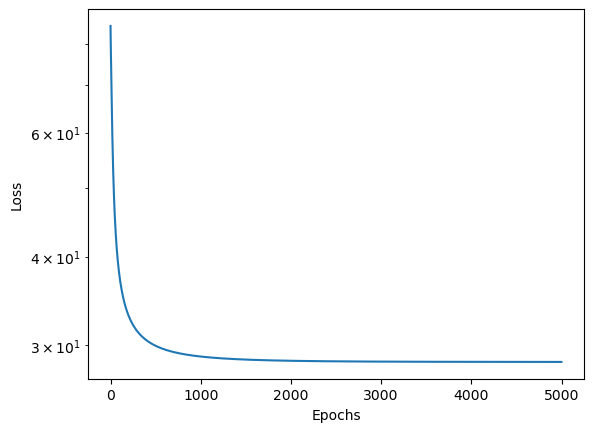

In [15]:
plt.plot(model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.semilogy()

In [16]:
# Plot the decision boundary
xx = np.linspace(0, 1, 500)
yy = np.linspace(0, 1, 500)
XX, YY = np.meshgrid(xx, yy)
ZZ = np.zeros(XX.shape)
for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        ZZ[i, j] = model.forward(np.array([[XX[i, j], YY[i, j]]]))

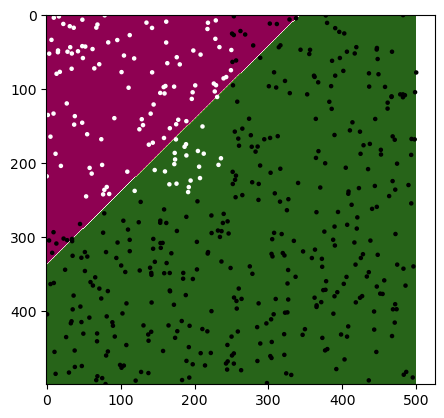

In [17]:
fig, ax = plt.subplots()
ax.imshow(ZZ>0.5, cmap='PiYG')
ax.scatter(500* X[:, 0], 500 * X[:, 1], c=y[:, 0], cmap='bone_r', s=5)

# That's it for the perceptron

It's probably worth a couple of minutes of reflection on why the perceptron chooses the decision boundary it does for this problem. It's not the best boundary, but it's the best one that can be represented by a single line. In this case, the learning process (gradient descent) did the best job that it could with the model class that it was using. 